### Objective:

- To explore and compare the performance of various machine learning algorithms in predicting customer churn for a Telco company, and identify the most effective method for predicting customer churn.


###  Constraints:

- Data Availability: The quality and availability of historical customer data are crucial. Ensure that relevant data (such as customer profiles, usage patterns, and billing information) is accessible.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.max_columns', 0)

C:\Users\RATNADEEP\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# TotalCharges is a numeric column but showing as categorical need to convert it to float 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') #The parameter errors='coerce' ensures that if any value cannot be converted to numeric, it will be set as 

In [7]:
df['TotalCharges'].dtype

dtype('float64')

In [8]:
df.head(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


In [10]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
df.duplicated().sum()

0

## EDA

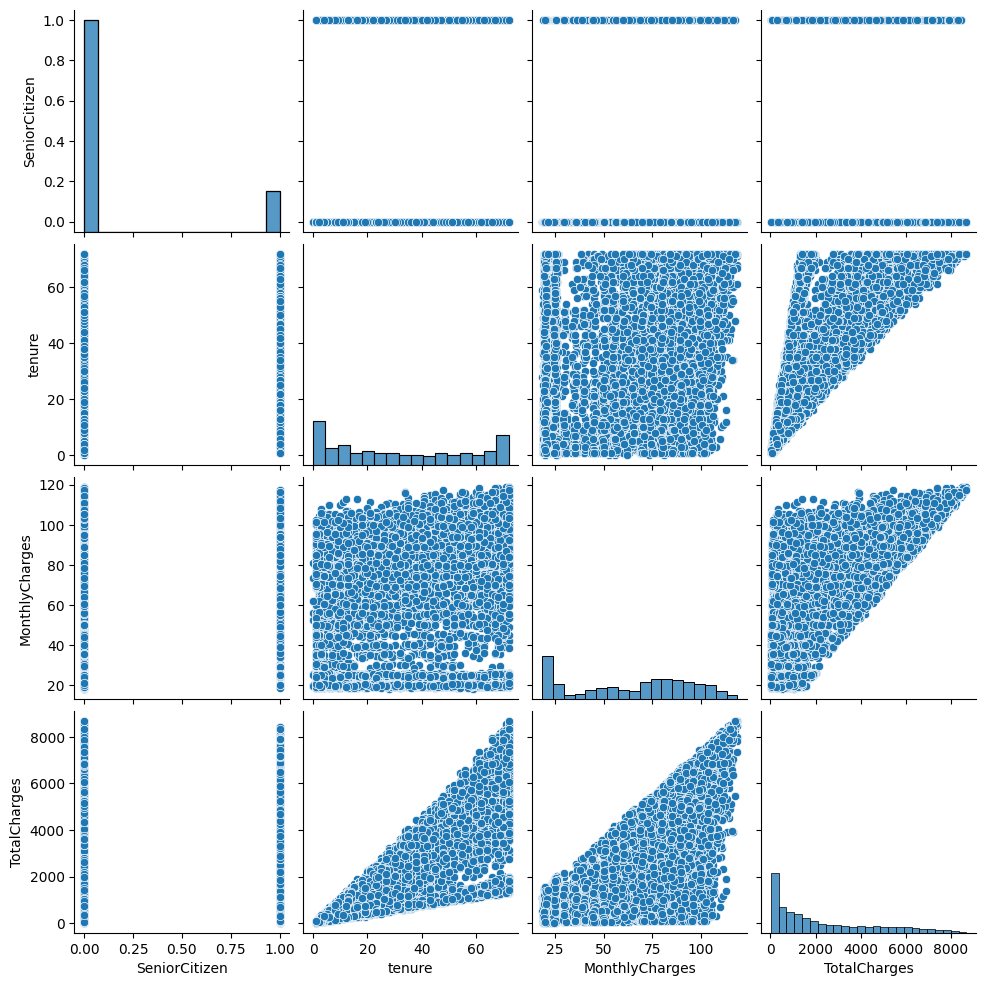

In [12]:
sns.pairplot(df)
plt.show()

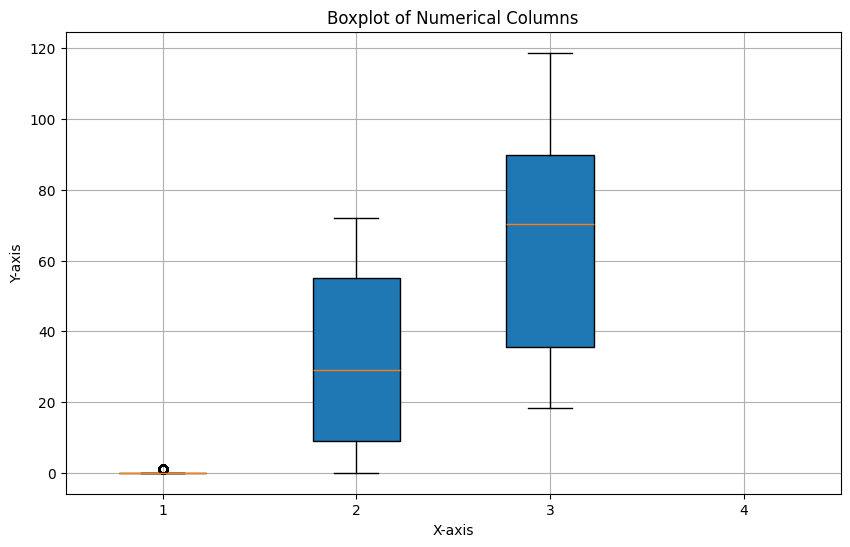

In [13]:
# Extracting numerical columns
numerical_cols = df.select_dtypes(include=['number'])

# Creating a boxplot for numerical columns
plt.figure(figsize=(10, 6))
plt.boxplot(numerical_cols.values, patch_artist=True)

# Adding title and labels
plt.title('Boxplot of Numerical Columns')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

# Showing the plot
plt.grid(True)
plt.show()

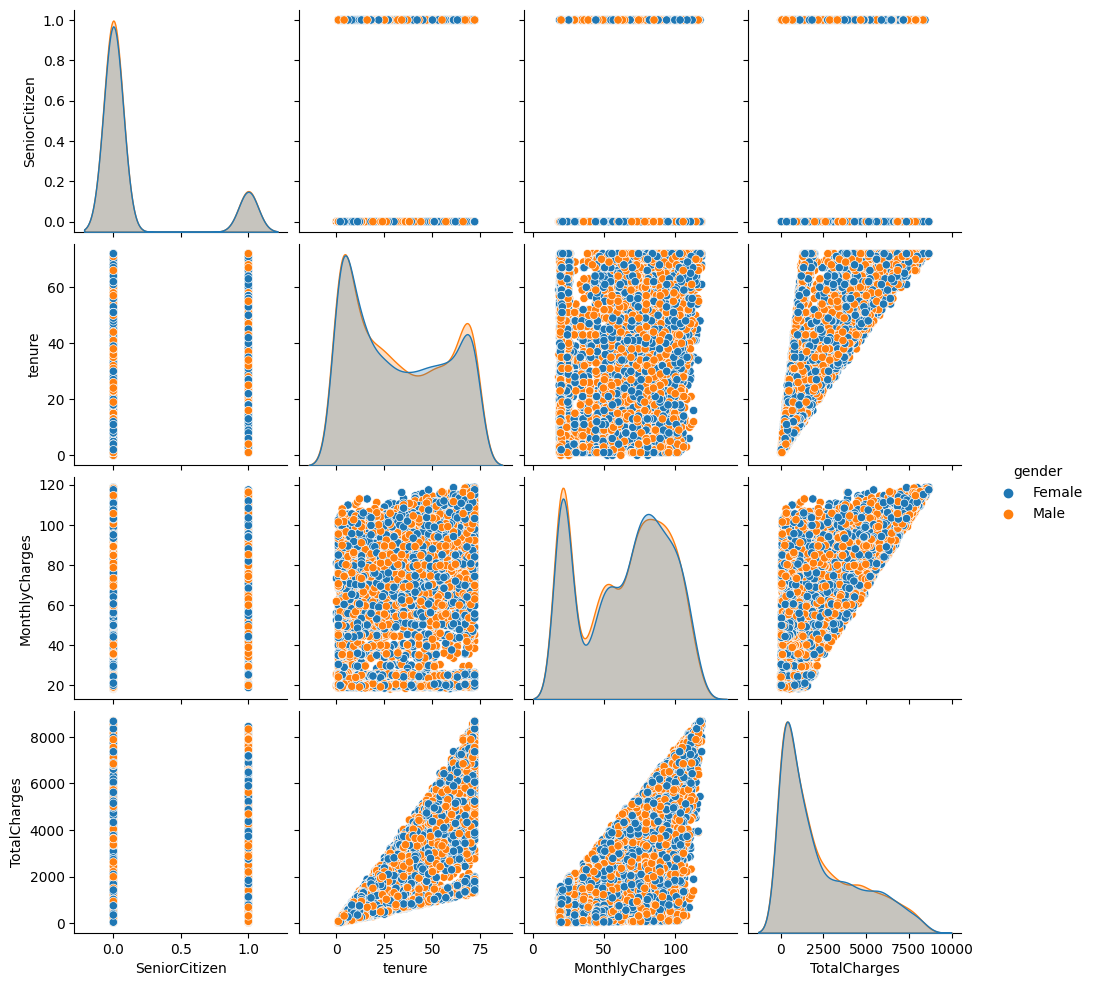

In [14]:
sns.pairplot(df, hue='gender')
plt.show()

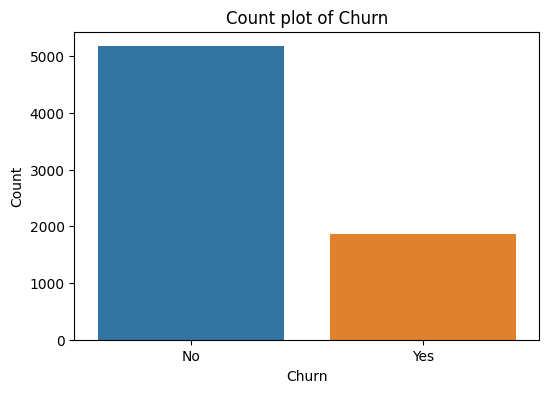

In [15]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn', data=df)
plt.title('Count plot of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

The following bar plot shows the target variable of churn yes and no. The proportion of churn is an imbalanced data set because both classes are not equally distributed. 

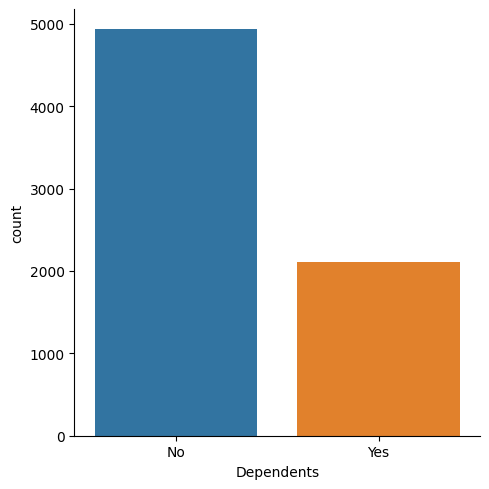

In [16]:
sns.catplot(x="Dependents", kind="count", data=df)
plt.show()

- Users who have non-dependents are approximately two times more than users having dependents

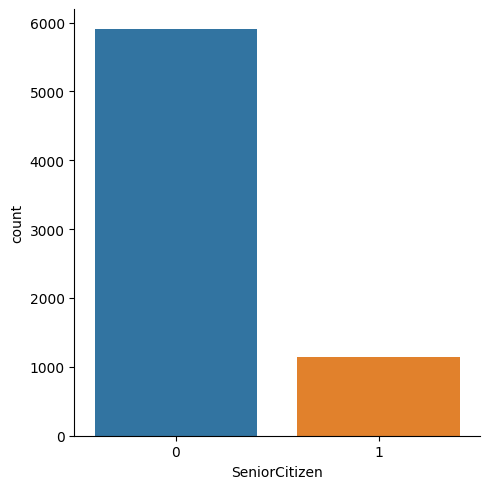

In [17]:
sns.catplot(x="SeniorCitizen", kind="count", data=df)
plt.show()


- The majority of the users are not Senior Citizen

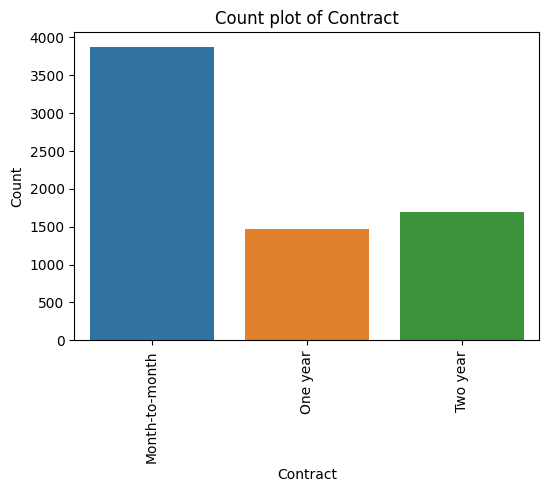

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Contract", data=df)
plt.title('Count plot of Contract')
plt.xlabel('Contract')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

- Most of the users prefer Month-to-month contract

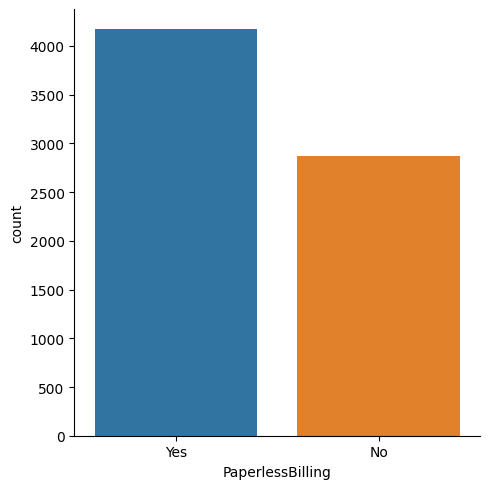

In [19]:
sns.catplot(x="PaperlessBilling", kind="count", data=df)
plt.show()

- Most of the users prefer paperless billing 

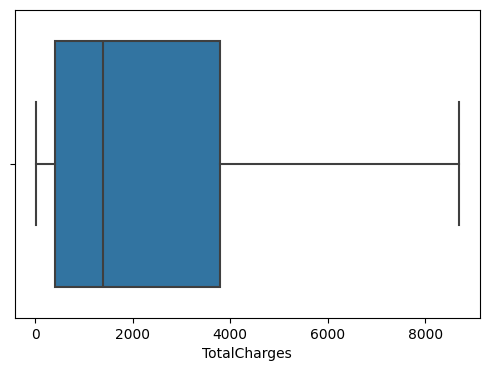

In [20]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df["TotalCharges"])
plt.show()

- The total charges fall under 4000 for majority of the users

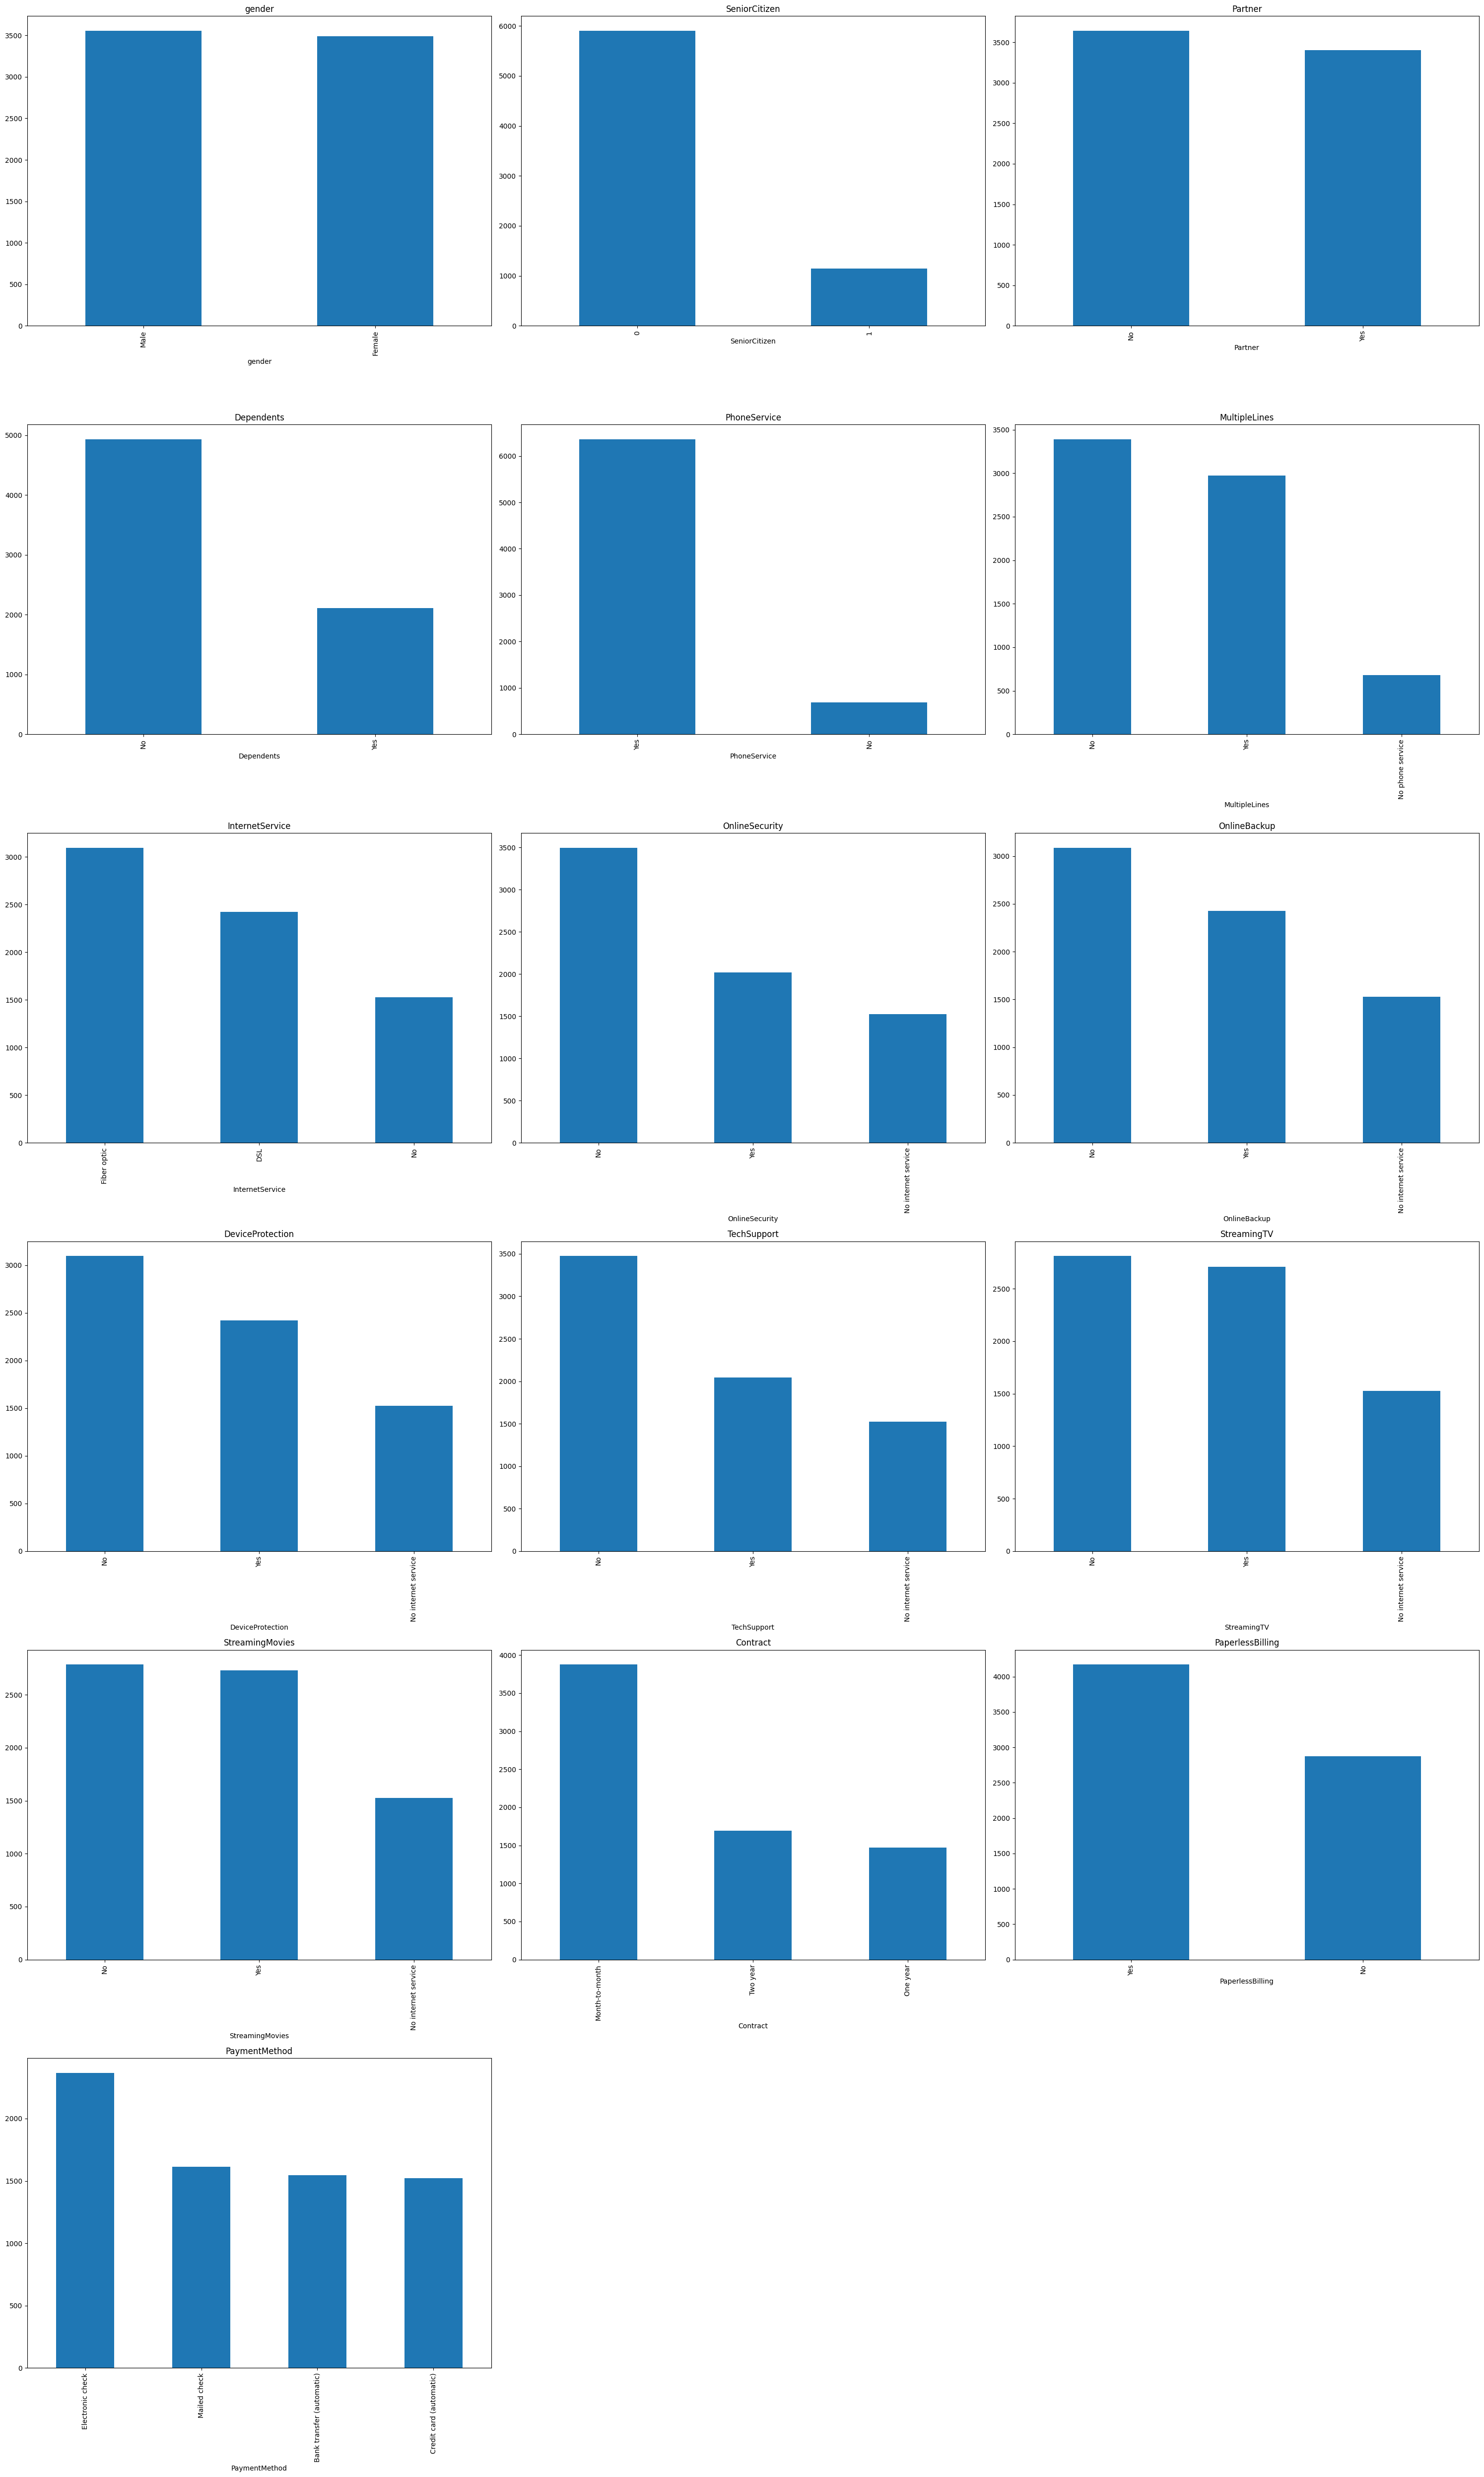

In [21]:
categorical_variables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']
fig, axs = plt.subplots(len(categorical_variables) // 3 + 1, 3, figsize=(30, 50))

for i, var in enumerate(categorical_variables):
    row = i // 3
    col = i % 3
    df[var].value_counts().plot(kind='bar', ax=axs[row, col], title=var)

# Remove any extra empty subplots
for i in range(len(categorical_variables), len(axs.flat)):
    fig.delaxes(axs.flatten()[i])

plt.tight_layout()
plt.show()



Observations from the categorical barplots¶
- Genders, seems we have equal number of both males and females, and both show equal amount of churned customers.

- We have young customers compared to senior.

- Seems we have more customers without dependent members than those who have.

- Also the majority of customers who don't have a phone service are way more than those who have.

- Customers who have internet service, prefer mostly DSL or Fiber optic.

- The features, StreamingMovies and StreamingTV has similar barplots, which means there is an equal amount of customers who prefer to either prefer these services or not to.

- In general customers prefer month-to-month contracts wcompared to other types such as two year or one year contracts.

- Finally, most customers would rather have Paperless billing than any other form and seems they use all the different forms of banking transactions such with Electronic Check being the majority.

## Data Preprocessing

In [22]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [23]:
df[df['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [24]:
df.dropna(subset=['TotalCharges'], inplace=True)

In [25]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
## checking duplicate value
df.duplicated().sum()

0

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [31]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


### Label encoding

In [32]:
encoder = LabelEncoder() # to encode string to the values like 0,1,2 

In [33]:
feature_Label_encoder = ['Partner','gender','Dependents','PhoneService','PaperlessBilling','Churn']
for column in feature_Label_encoder:
    df[column] = encoder.fit_transform(df[column])

In [34]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0


In [35]:
df['TotalCharges'].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

### Onehot encoding

In [36]:
col_list = ['MultipleLines','InternetService','OnlineBackup','OnlineSecurity',
                'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod']
for i in col_list:
    one = OneHotEncoder()
    df[i] = one.fit_transform(df[[i]]).todense()[:,0:1]

In [37]:
features_mms = ['tenure','MonthlyCharges','TotalCharges']

df_mms = pd.DataFrame(df, columns=features_mms)
df_remaining = df.drop(columns=features_mms)

mms = MinMaxScaler(feature_range=(0,1))
rescaled_feature = mms.fit_transform(df_mms)

rescaled_feature_df = pd.DataFrame(rescaled_feature, columns=features_mms,index=df_remaining.index)
df = pd.concat([rescaled_feature_df,df_remaining],axis=1)

In [38]:
df.head(2)

,tenure,MonthlyCharges,TotalCharges,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0.000000,0.115423,0.001275,7590-VHVEG,0,0,1,0,0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,0.0,0
1,0.464789,0.385075,0.215867,5575-GNVDE,1,0,0,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0.0,0


In [39]:
df['customerID'].count()

7032

In [40]:
## dropping customer ID 
df.drop('customerID', axis=1, inplace=True)

In [41]:
df.head(3)

,tenure,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0.000000,0.115423,0.001275,0,0,1,0,0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1,0.0,0
1,0.464789,0.385075,0.215867,1,0,0,0,1,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0,0.0,0
2,0.014085,0.354229,0.010310,1,0,0,0,1,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1,0.0,1


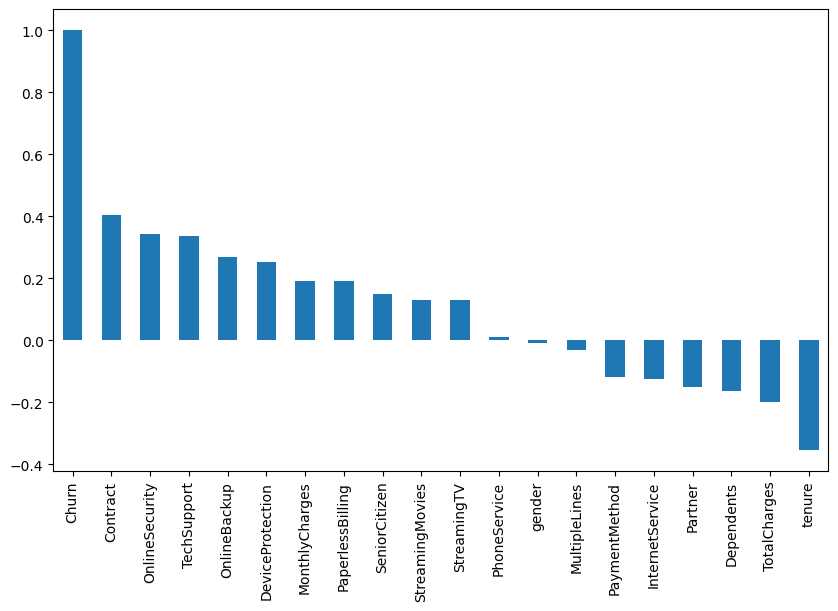

In [42]:
plt.figure(figsize=(10,6))
df.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")
plt.show()

The following plot above is to know the correlation between some variables to target variable churn. The highest correlation is the Contract variable so that variable is so related to churn rate. Tenure is had a negative correlation with churn so higher values from tenure make a lower churn.

### Splitting the data

In [43]:
X = df.drop('Churn', axis=1)
y =df['Churn']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25, random_state=42, stratify=y)

In [45]:
X_train.shape,X_test.shape,y_train.shape, y_test.shape

((5274, 19), (1758, 19), (5274,), (1758,))

### Step 4: Feature selection

In [84]:
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

### KNN classifier

In [89]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_selected, y_train)

KNeighborsClassifier(n_neighbors=10)

In [90]:
y_pred = knn.predict(X_test_selected)

In [91]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 77.76%
Precision: 61.31%
Recall: 44.11%
F1-score: 51.31%


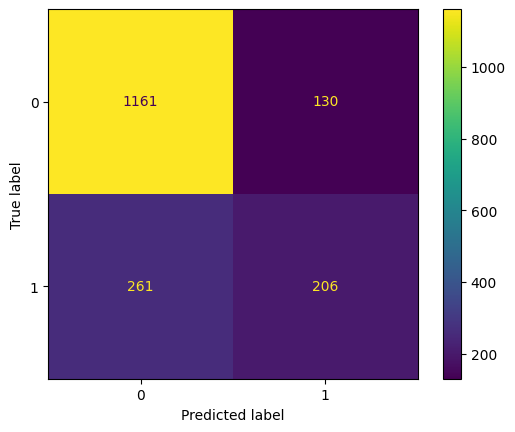

In [92]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [94]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1291
           1       0.61      0.44      0.51       467

    accuracy                           0.78      1758
   macro avg       0.71      0.67      0.68      1758
weighted avg       0.76      0.78      0.76      1758



### GaussianNB

In [54]:
from sklearn.naive_bayes import GaussianNB

In [95]:
GNB = GaussianNB()
GNB.fit(X_train_selected, y_train)

GaussianNB()

In [96]:
y_pred = GNB.predict(X_test_selected)

In [97]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 73.83%
Precision: 50.51%
Recall: 74.09%
F1-score: 60.07%


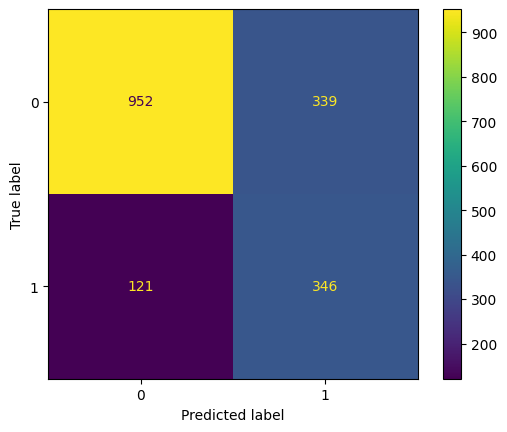

In [98]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [99]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1291
           1       0.51      0.74      0.60       467

    accuracy                           0.74      1758
   macro avg       0.70      0.74      0.70      1758
weighted avg       0.79      0.74      0.75      1758



### Mixed naive bayes

In [100]:
from mixed_naive_bayes import MixedNB

mnb = MixedNB()
mnb.fit(X_train_selected, y_train)

MixedNB(alpha=0.5, var_smoothing=1e-09)

In [101]:
y_pred = mnb.predict(X_test_selected)

In [102]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 73.83%
Precision: 50.51%
Recall: 74.09%
F1-score: 60.07%


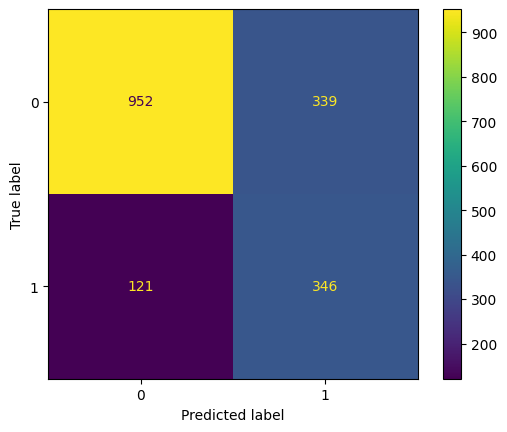

In [103]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [104]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1291
           1       0.51      0.74      0.60       467

    accuracy                           0.74      1758
   macro avg       0.70      0.74      0.70      1758
weighted avg       0.79      0.74      0.75      1758



### Logisitic regression

In [105]:
lr = LogisticRegression()
lr.fit(X_train_selected,y_train)

LogisticRegression()

In [106]:
y_pred = lr.predict(X_test_selected)

In [107]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 79.12%
Precision: 62.02%
Recall: 55.25%
F1-score: 58.44%


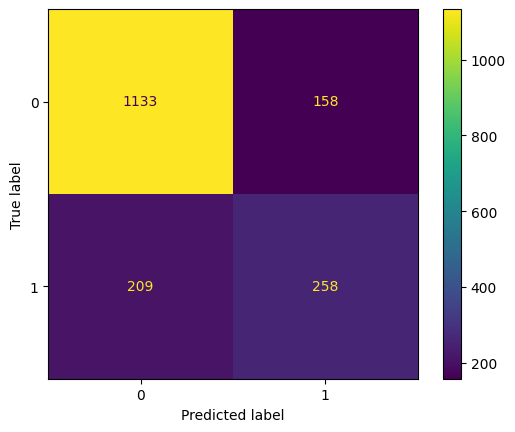

In [108]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [109]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1291
           1       0.62      0.55      0.58       467

    accuracy                           0.79      1758
   macro avg       0.73      0.72      0.72      1758
weighted avg       0.78      0.79      0.79      1758



### GradientBoosting

In [110]:
Gb = GradientBoostingClassifier()
Gb.fit(X_train_selected,y_train)

GradientBoostingClassifier()

In [111]:
y_pred = Gb.predict(X_test_selected)

In [112]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 79.64%
Precision: 64.46%
Recall: 52.03%
F1-score: 57.58%


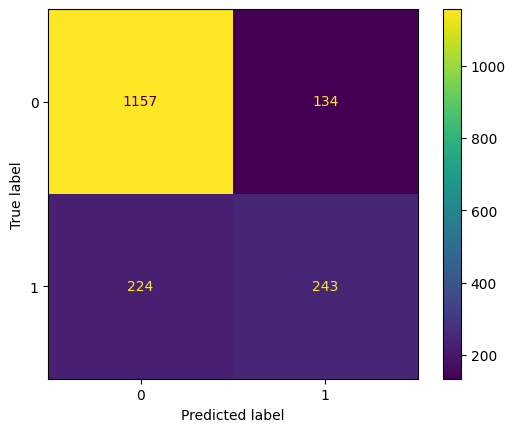

In [113]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [114]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1291
           1       0.64      0.52      0.58       467

    accuracy                           0.80      1758
   macro avg       0.74      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



### Random Forest

In [115]:
Rf = RandomForestClassifier()
Rf.fit(X_train_selected,y_train)

RandomForestClassifier()

In [116]:
y_pred = Rf.predict(X_test_selected)

In [117]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))

Accuracy: 77.87%
Precision: 60.32%
Recall: 48.82%
F1-score: 53.96%


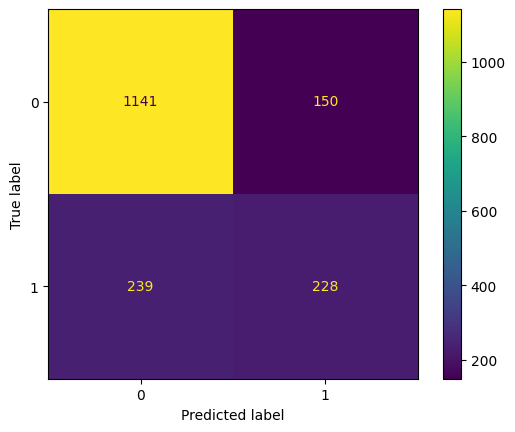

In [118]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred)).plot()

In [119]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1291
           1       0.60      0.49      0.54       467

    accuracy                           0.78      1758
   macro avg       0.71      0.69      0.70      1758
weighted avg       0.77      0.78      0.77      1758



In [ ]:
Dec

In [120]:
selector = SelectKBest(score_func=f_classif, k=10)

selector.fit(X_train, y_train)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features from the original feature set
selected_feature_names = X_train.columns[selected_feature_indices] 
print(selected_feature_names)


Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Dependents',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'Contract', 'PaperlessBilling'],
      dtype='object')


### Creating pickel file

In [125]:
import pickle

In [126]:
pickle.dump(Gb,open("churn.pkl",'wb'))

In [132]:
pickle.load(open("churn.pkl",'rb'))

GradientBoostingClassifier()